---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [ ]:
def answer_one():
    
    # Your code here
    
    return y.value_counts()[1]/y.size


In [9]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(y.value_counts()[1]/y.size)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

0.016410823768


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [11]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
    
    return dummy_majority.score(X_test, y_test), recall_score(y_test, dummy_majority.predict(X_test))

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [13]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    default_svc = SVC().fit(X_train, y_train)
    
    predicts = default_svc.predict(X_test)
    
    return default_svc.score(X_test,y_test), recall_score(y_test, predicts), precision_score(y_test, predicts)

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [18]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
        
    svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    
    predicts = svc.decision_function(X_test) > -220
    
    return confusion_matrix(y_test, predicts)

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

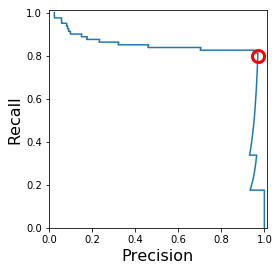

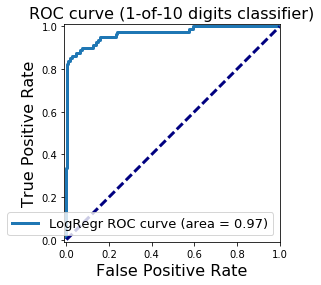

(array([ 0.825]),
 array([], dtype=float64),
 array([  0.00000000e+00,   0.00000000e+00,   1.87125749e-04,
          1.87125749e-04,   3.74251497e-04,   3.74251497e-04,
          5.61377246e-04,   5.61377246e-04,   5.23952096e-03,
          5.23952096e-03,   1.47829341e-02,   1.47829341e-02,
          2.69461078e-02,   2.69461078e-02,   4.26646707e-02,
          4.26646707e-02,   6.17514970e-02,   6.17514970e-02,
          7.52245509e-02,   7.52245509e-02,   1.23315868e-01,
          1.23315868e-01,   1.37911677e-01,   1.37911677e-01,
          1.48577844e-01,   1.48577844e-01,   1.59618263e-01,
          1.59618263e-01,   2.04715569e-01,   2.05276946e-01,
          2.16878743e-01,   2.17252994e-01,   2.31287425e-01,
          2.31287425e-01,   2.37836826e-01,   2.37836826e-01,
          2.68899701e-01,   2.69273952e-01,   4.74738024e-01,
          4.75112275e-01,   5.75598802e-01,   5.75598802e-01,
          5.94498503e-01,   5.94498503e-01,   6.83757485e-01,
          6.84131737e-01,

In [37]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    
    logistic = LogisticRegression().fit(X_train, y_train)
    
    precision, recall, thresholds = precision_recall_curve(y_test, logistic.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, logistic.decision_function(X_test))
    
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    
    result_recall = recall[np.where(precision==0.75)]
    
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
    result_tpr = tpr[np.where(fpr==1.59618263e-01)]
    
    return result_recall, result_tpr, fpr, np.where(fpr==1.59618263e-01)

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [51]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    logistic = LogisticRegression()
    
    grid_values = {
        'penalty': ['l1', 'l2'],
        'C':[0.01, 0.1, 1, 10, 100]
    }
    
    grid_recall = GridSearchCV(logistic, param_grid = grid_values, scoring='recall', cv=3)
    
    grid_recall.fit(X_train, y_train)

    
    
    return grid_recall.cv_results_
answer_six()

{'mean_fit_time': array([ 0.09698033,  0.1634771 ,  0.13618843,  0.25058198,  0.24546639,
         0.29881279,  0.50306892,  0.36571097,  0.51845749,  0.34281143]),
 'mean_score_time': array([ 0.00380548,  0.00546614,  0.0059367 ,  0.00842921,  0.00678635,
         0.01541543,  0.0182217 ,  0.00719102,  0.01007549,  0.01047373]),
 'mean_test_score': array([ 0.66666667,  0.76086957,  0.80072464,  0.80434783,  0.8115942 ,
         0.8115942 ,  0.80797101,  0.8115942 ,  0.80797101,  0.80797101]),
 'mean_train_score': array([ 0.68115942,  0.77355072,  0.80615942,  0.8134058 ,  0.81884058,
         0.81702899,  0.82427536,  0.82427536,  0.82427536,  0.82427536]),
 'param_C': masked_array(data = [0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2'],
              mask = [False False False False False False Fals

<IPython.core.display.Javascript object>


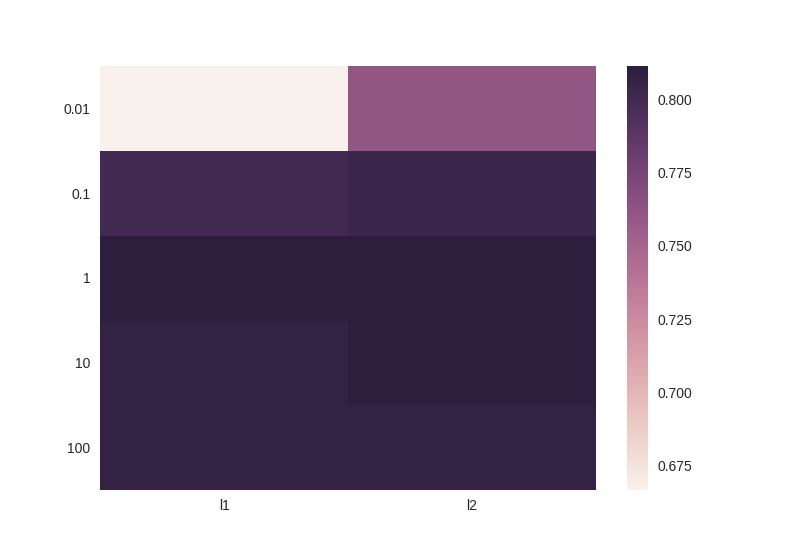

In [50]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())